In [28]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path):
    """Charge les données à partir du fichier CSV."""
    return pd.read_csv(file_path)

def apply_gmm(data, column, n_components_range=range(1, 8)):
    """Applique le GMM à une colonne spécifique pour trouver le nombre optimal de clusters."""
    X = data[column].values.reshape(-1, 1)  # Redimensionnement pour le GMM
    bics = []
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(X)
        bics.append(gmm.bic(X))
    optimal_n_components = n_components_range[np.argmin(bics)]
    gmm_optimal = GaussianMixture(n_components=optimal_n_components, random_state=42)
    gmm_optimal.fit(X)
    cluster_labels = gmm_optimal.predict(X)
    return optimal_n_components, cluster_labels, n_components_range, bics

def generate_columns_to_exclude(X):
    """Génère la liste des colonnes à exclure en fonction de la valeur de X."""
    base_columns_to_exclude = [
        "nightlights_50m", "nightlights_20m","nightlights_100m",
        "nightlights_25m", "nightlights_30m", "nightlights_150m",
        "nightlights_1000m", "nightlights_5000m", "nightlights_0m"
    ]
    
    specific_column = f"nightlights_{X}m"
    if specific_column in base_columns_to_exclude:
        base_columns_to_exclude.remove(specific_column)
    
    return base_columns_to_exclude

def main(file_path, X, moitiequarts, Y):
    """Charge les données, applique le GMM, et prépare le DataFrame final selon les paramètres fournis."""
    # Générer les noms dynamiquement
    column_to_cluster = f"nightlights_{X}m"
    df_name = f"df_nightlights_{X}m_{moitiequarts}_IPM_{Y}"
    bin_column = f"nightlights_{X}m_bins"
    
    # Générer la liste des colonnes à exclure
    columns_to_exclude = generate_columns_to_exclude(X)
    
    # Charger les données
    data = load_data(file_path)
    
    # Appliquer le GMM
    optimal_n_components, cluster_labels, n_components_range, bics = apply_gmm(data, column_to_cluster)
    
    # Afficher la liste des scores BIC
    print("Scores BIC pour chaque nombre de clusters :")
    for n, bic in zip(n_components_range, bics):
        print(f"Nombre de clusters: {n}, BIC: {bic}")
    
    # Créer le DataFrame final et ajouter les étiquettes de cluster
    df_result = data.drop(columns=columns_to_exclude)
    df_result[bin_column] = cluster_labels
    
    # Afficher les résultats
    print(f"Nombre optimal de clusters pour '{column_to_cluster}': {optimal_n_components}")
    print(df_result.head())
    
    # Sauvegarder le DataFrame avec un nom dynamique
    globals()[df_name] = df_result

    # Tracer le graphique des scores BIC
    plt.figure(figsize=(10, 6))
    plt.plot(n_components_range, bics, marker='o', linestyle='-')
    plt.title("Relation entre le nombre de clusters et le BIC")
    plt.xlabel("Nombre de clusters")
    plt.ylabel("Score BIC")
    plt.grid(True)
    
    # Annoter chaque point avec son score BIC en texte oblique
    for (i, txt) in zip(n_components_range, bics):
        plt.annotate(f"{txt:.2f}",  # Texte à annoter
                     (i, txt),  # Position (x, y) pour l'annotation
                     textcoords="offset points",  # Coordonnées relatives à la position
                     xytext=(0, 5),  # Décalage textuel (x, y)
                     ha='center',  # Alignement horizontal
                     rotation=45)  # Texte oblique

    plt.show()
    
    # Tracer l'histogramme de la distribution des "nightlights"
    plt.figure(figsize=(10, 6))
    plt.hist(df_result[bin_column], bins='auto', alpha=0.7, rwidth=0.85)
    plt.xlabel(f'Nightlights Bin {X} mètres')  # Label for the x-axis
    plt.ylabel('Frequency')  # Label for the y-axis
    plt.title(f'Distribution of Nightlights Bin {X} mètres')  # Title of the histogram
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    
    # Définir le chemin du fichier de sortie
    output_file_path = f'D:\\Poverty_Predict_Par_Milieu\\Data_rural\\df_nightlights_{X}m_{moitiequarts}_IPM_{Y}.csv'

    # Exporter le DataFrame en fichier CSV
    df_result.to_csv(output_file_path, index=False)
    print(f"DataFrame sauvegardé sous {output_file_path}")
    
    # Retourner le DataFrame avec le nom dynamique
    return df_result


Scores BIC pour chaque nombre de clusters :
Nombre de clusters: 1, BIC: 28787.802025281875
Nombre de clusters: 2, BIC: 13797.512157507888
Nombre de clusters: 3, BIC: 10883.441094888725
Nombre de clusters: 4, BIC: 10314.37596920209
Nombre de clusters: 5, BIC: 10179.146311595852
Nombre de clusters: 6, BIC: 10143.262376613911
Nombre de clusters: 7, BIC: 10144.896331162568
Nombre optimal de clusters pour 'nightlights_50m': 6
  country  year    hhid  grappe  menage  vague      zae              region  \
0     CIV  2018  8101.0      81       1      1  SUD-EST  AUTONOME D'ABIDJAN   
1     CIV  2018  8103.0      81       3      1  SUD-EST  AUTONOME D'ABIDJAN   
2     CIV  2018  8104.0      81       4      1  SUD-EST  AUTONOME D'ABIDJAN   
3     CIV  2018  8105.0      81       5      1  SUD-EST  AUTONOME D'ABIDJAN   
4     CIV  2018  8106.0      81       6      1  SUD-EST  AUTONOME D'ABIDJAN   

  milieu milieu2  ...                     interview__id  GPS__Latitude  \
0  Rural   Rural  ...  d03

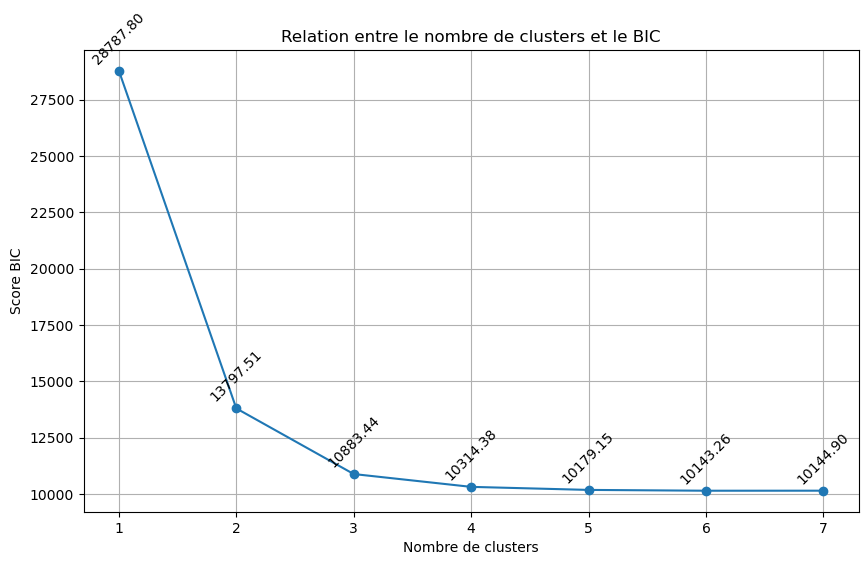

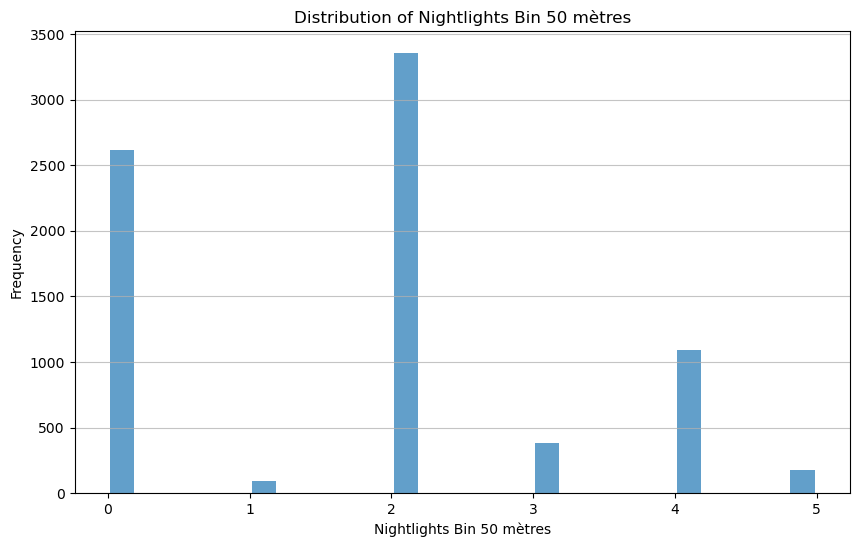

DataFrame sauvegardé sous D:\Poverty_Predict_Par_Milieu\Data_rural\df_nightlights_50m_moitie_IPM_100.csv


In [29]:
# Paramètres de l'utilisateur
file_path = r'D:\Poverty_Predict_Par_Milieu\rural_data.csv' #Chemin des données d'enquetes en milieu rural

X = 50
moitiequarts = 'moitie'
Y = 100

# Exécution principale
df_result = main(file_path, X, moitiequarts, Y)

In [30]:
# Affichage du DataFrame avec le nom dynamique
df_name = f"df_nightlights_{X}m_{moitiequarts}_IPM_{Y}"
print(f"Affichage de {df_name} :")
print(globals()[df_name])

Affichage de df_nightlights_50m_moitie_IPM_100 :
     country  year      hhid  grappe  menage  vague      zae  \
0        CIV  2018    8101.0      81       1      1  SUD-EST   
1        CIV  2018    8103.0      81       3      1  SUD-EST   
2        CIV  2018    8104.0      81       4      1  SUD-EST   
3        CIV  2018    8105.0      81       5      1  SUD-EST   
4        CIV  2018    8106.0      81       6      1  SUD-EST   
...      ...   ...       ...     ...     ...    ...      ...   
7707     CIV  2019  108408.0    1084       8      2   CENTRE   
7708     CIV  2019  108409.0    1084       9      2   CENTRE   
7709     CIV  2019  108410.0    1084      10      2   CENTRE   
7710     CIV  2019  108411.0    1084      11      2   CENTRE   
7711     CIV  2019  108412.0    1084      12      2   CENTRE   

                  region milieu milieu2  ...  \
0     AUTONOME D'ABIDJAN  Rural   Rural  ...   
1     AUTONOME D'ABIDJAN  Rural   Rural  ...   
2     AUTONOME D'ABIDJAN  Rural   Rura

In [31]:
globals()[df_name][f'nightlights_{X}m_bins'].unique()

array([5, 1, 3, 4, 0, 2], dtype=int64)

##### I - Affichage des grappes (ZD) (cette section n'est pas une nécessité)

In [32]:
Data_milieu='Data_rural'


In [33]:
import pandas as pd

# Charger le DataFrame sans doublons
file_path = f'D:\\Poverty_Predict_Par_Milieu\\{Data_milieu}\\df_nightlights_{X}m_{moitiequarts}_IPM_{Y}.csv'
df = pd.read_csv(file_path)

# Afficher les éléments de la colonne 'grappe'
print("Éléments de la colonne 'grappe':")
print(df['grappe'])

# Afficher les chiffres uniques dans la colonne 'grappe'
unique_values = df['grappe'].unique()
print("\nChiffres uniques dans la colonne 'grappe':")
print(unique_values)

# Afficher la fréquence de chaque chiffre unique
value_counts = df['grappe'].value_counts()
print("\nFréquence des chiffres dans la colonne 'grappe':")
print(value_counts)


Éléments de la colonne 'grappe':
0         81
1         81
2         81
3         81
4         81
        ... 
7707    1084
7708    1084
7709    1084
7710    1084
7711    1084
Name: grappe, Length: 7712, dtype: int64

Chiffres uniques dans la colonne 'grappe':
[  81   83   84   85   86   87   97   98   99  100  101  102  105  106
  109  110  111  112  114  115  116  117  118  119  120  121  122  123
  124  125  128  129  130  131  132  133  134  135  137  138  139  140
  141  142  143  155  156  157  158  159  160  161  163  165  168  169
  170  171  172  173  174  175  176  177  178  181  182  205  206  207
  208  209  210  211  212  213  214  221  223  224  225  228  229  230
  231  232  233  237  238  241  242  244  245  246  248  249  250  251
  253  254  258  259  260  262  263  264  265  274  275  277  278  279
  280  282  284  287  288  289  290  291  293  310  311  312  313  314
  315  321  322  323  324  325  327  328  329  330  331  332  333  334
  335  336  337  338  339  34

##### Ajout d'une colonne 'is_train'

In [34]:
import pandas as pd

def load_dataframe(file_path):
    """Charger le DataFrame à partir du fichier CSV."""
    return pd.read_csv(file_path)

def mark_sample_by_group(df, group_column, n_samples):
    """Grouper le DataFrame par la colonne spécifiée, sélectionner un nombre aléatoire de lignes par groupe, et marquer ces lignes."""
    # Créer une colonne 'is_train' initialisée à False
    df['is_train'] = False
    # Sélectionner aléatoirement des échantillons par groupe
    sampled_indices = df.groupby(group_column).apply(lambda x: x.sample(n_samples).index).explode()
    # Marquer les lignes sélectionnées
    df.loc[sampled_indices, 'is_train'] = True
    return df

def save_dataframe(df, file_path):
    """Sauvegarder le DataFrame en fichier CSV."""
    df.to_csv(file_path, index=False)

In [35]:
# Définir les variables X, moitiequarts et Y pour personnaliser les chemins de fichiers
X = 50
moitiequarts = 'moitie'
Y = 100
Data_milieu='Data_rural'

In [36]:
# Chemin vers le fichier CSV d'origine
original_file_path = f'D:\\Poverty_Predict_Par_Milieu\\{Data_milieu}\\df_nightlights_{X}m_{moitiequarts}_IPM_{Y}.csv'

# Charger le DataFrame
df = load_dataframe(original_file_path)

# Marquer les lignes sélectionnées de manière aléatoire par groupe
df_marked = mark_sample_by_group(df, 'grappe', 2)
print("DataFrame avec colonne 'is_train':")
print(df_marked)

# Sauvegarder le DataFrame avec la nouvelle colonne 'is_train' en tant que fichier CSV
new_file_path = f'D:\\Poverty_Predict_Par_Milieu\\{Data_milieu}\\df_nightlights_{X}m_{moitiequarts}_IPM_{Y}_marked.csv'

save_dataframe(df_marked, new_file_path)

print("Le DataFrame avec colonne 'is_train' a été sauvegardé avec succès.")


DataFrame avec colonne 'is_train':
     country  year      hhid  grappe  menage  vague      zae  \
0        CIV  2018    8101.0      81       1      1  SUD-EST   
1        CIV  2018    8103.0      81       3      1  SUD-EST   
2        CIV  2018    8104.0      81       4      1  SUD-EST   
3        CIV  2018    8105.0      81       5      1  SUD-EST   
4        CIV  2018    8106.0      81       6      1  SUD-EST   
...      ...   ...       ...     ...     ...    ...      ...   
7707     CIV  2019  108408.0    1084       8      2   CENTRE   
7708     CIV  2019  108409.0    1084       9      2   CENTRE   
7709     CIV  2019  108410.0    1084      10      2   CENTRE   
7710     CIV  2019  108411.0    1084      11      2   CENTRE   
7711     CIV  2019  108412.0    1084      12      2   CENTRE   

                  region milieu milieu2  ...  GPS__Latitude  GPS__Longitude  \
0     AUTONOME D'ABIDJAN  Rural   Rural  ...       5.480360       -4.151238   
1     AUTONOME D'ABIDJAN  Rural   Rura

#### Concatenation de la colonne 'is train' et des images, nous avons 2 ménages par ZD sélectionnés aléatoirement en zone urbaine

In [37]:
import os
import pandas as pd

def process_images_and_merge_data(csv_file_path, images_folder_path, save_folder_path, X, moitiequarts, Y):
    """Automatise le traitement des images et la fusion des données avec des noms de variables dynamiques."""
    # Générer le nom dynamique du DataFrame
    df_name = f"df_nightlights_{X}m_{moitiequarts}_IPM_{Y}"
    
    # Lire le fichier CSV sauvegardé
    df_nightlights = pd.read_csv(csv_file_path)
    
    # Extraire les informations des images
    image_info = []
    for image_file in os.listdir(images_folder_path):
        base_name, _ = os.path.splitext(image_file)
        base_name_with_extension = base_name + '.png'
        parts = base_name.split('_')
        if len(parts) >= 2:
            menage_lat, menage_lon = float(parts[0]), float(parts[1])
            image_info.append({
                'image_name': base_name_with_extension,
                'menage_lat': menage_lat,
                'menage_lon': menage_lon
            })

    df_images = pd.DataFrame(image_info)
    
    # Convertir les latitudes et longitudes pour la fusion
    df_nightlights['GPS__Latitude'] = df_nightlights['GPS__Latitude'].astype(float)
    df_nightlights['GPS__Longitude'] = df_nightlights['GPS__Longitude'].astype(float)

    # Fusionner les DataFrames
    df_download = pd.merge(df_images, df_nightlights, 
                           left_on=['menage_lat', 'menage_lon'], 
                           right_on=['GPS__Latitude', 'GPS__Longitude'], how='inner')

    # Sélection et renommage des colonnes pour le résultat final
    df_download = df_download.rename(columns={
        'pcexp': 'pcexp',
        f'nightlights_{X}m': f'nightlights_{X}m',
        f'nightlights_{X}m_bins': f'nightlights_{X}m_bins'
    })

    # Ajouter les colonnes 'grappe' et 'is_train'
    df_download['grappe'] = df_download['grappe']
    df_download['hhweight']=df_download['hhweight']
    df_download['hhsize']=df_download['hhsize']
    df_download['is_train'] = df_download['is_train']

    df_download = df_download[['image_name', 'menage_lat', 'menage_lon', 'grappe', 'hhweight', 'hhsize','is_train', 'pcexp', f'nightlights_{X}m', f'nightlights_{X}m_bins']]
    
    # Sauvegarder le DataFrame fusionné avec les doublons
    download_file_path_with_duplicates = os.path.join(save_folder_path, f'df_download_{X}m_{moitiequarts}_IPM_{Y}.csv')
    df_download.to_csv(download_file_path_with_duplicates, index=False)
    
    print(f"DataFrame fusionné avec doublons sauvegardé sous {download_file_path_with_duplicates}")
    
    # Étape 6: Afficher les valeurs du DataFrame
    print(df_download.head())
    print(df_download.shape)
    
    # Identifier les doublons exacts dans 'image_name' et obtenir leurs indices
    doublons_indices = df_download[df_download.duplicated(subset=['image_name'], keep='first')].index

    # Afficher les valeurs de 'image_name' qui sont des doublons et leurs indices
    for indice in doublons_indices:
        valeur_doublon = df_download.loc[indice, 'image_name']
        print(f"Indice: {indice}, Valeur Doublon: {valeur_doublon}")

    # Supprimer les doublons, en ne gardant que la première occurrence
    df_download_sans_doublons = df_download.drop_duplicates(subset=['image_name'], keep='first')

    # Maintenant, df_download_sans_doublons contient le DataFrame sans les doublons

    # Sauvegarder le DataFrame sans doublons avec un nom dynamique
    download_file_path_without_duplicates = os.path.join(save_folder_path, f'df_download_{X}m_{moitiequarts}_IPM_{Y}_vf.csv')
    df_download_sans_doublons.to_csv(download_file_path_without_duplicates, index=False)
    
    print(f"DataFrame fusionné sans doublons sauvegardé sous {download_file_path_without_duplicates}")

    # Compter le nombre total d'images
    image_count = len(os.listdir(images_folder_path))
    print(f"Nombre total d'images : {image_count}")
    
    return df_download, df_download_sans_doublons


In [38]:
# Paramètres de l'utilisateur
X = 50
moitiequarts = 'moitie'
Y = 100
Data_milieu='Data_rural'

#### Changement de chemin

In [39]:
# Chemins des fichiers

csv_file_path = f'D:\\Poverty_Predict_Par_Milieu\\{Data_milieu}\\df_nightlights_{X}m_{moitiequarts}_IPM_{Y}_marked.csv'
images_folder_path =r'D:\Processed_Data_400_42m_100img\Processed_Data_400\Image_Nombre_100_images_code_5'
save_folder_path = f'D:\\Poverty_Predict_Par_Milieu\\{Data_milieu}'

In [40]:
# Exécution principale
df_download_result, df_download_sans_doublons_result = process_images_and_merge_data(csv_file_path, images_folder_path, save_folder_path, X, moitiequarts, Y)


DataFrame fusionné avec doublons sauvegardé sous D:\Poverty_Predict_Par_Milieu\Data_rural\df_download_50m_moitie_IPM_100.csv
                      image_name  menage_lat  menage_lon  grappe   hhweight  \
0    10.0003794_-5.5802424_1.png   10.000379   -5.580242    1047  268.36096   
1   10.0003794_-5.5802424_10.png   10.000379   -5.580242    1047  268.36096   
2  10.0003794_-5.5802424_100.png   10.000379   -5.580242    1047  268.36096   
3   10.0003794_-5.5802424_11.png   10.000379   -5.580242    1047  268.36096   
4   10.0003794_-5.5802424_12.png   10.000379   -5.580242    1047  268.36096   

   hhsize  is_train      pcexp  nightlights_50m  nightlights_50m_bins  
0       4     False  274696.28         2.232362                     4  
1       4     False  274696.28         2.232362                     4  
2       4     False  274696.28         2.232362                     4  
3       4     False  274696.28         2.232362                     4  
4       4     False  274696.28         2

In [41]:
pd.read_csv(f'D:\\Poverty_Predict_Par_Milieu\\{Data_milieu}\\df_download_{X}m_{moitiequarts}_IPM_{Y}_vf.csv')


,image_name,menage_lat,menage_lon,grappe,hhweight,hhsize,is_train,pcexp,nightlights_50m,nightlights_50m_bins
0,10.0003794_-5.5802424_1.png,10.000379,-5.580242,1047,268.36096,4,False,274696.28,2.232362,4
1,10.0003794_-5.5802424_10.png,10.000379,-5.580242,1047,268.36096,4,False,274696.28,2.232362,4
2,10.0003794_-5.5802424_100.png,10.000379,-5.580242,1047,268.36096,4,False,274696.28,2.232362,4
3,10.0003794_-5.5802424_11.png,10.000379,-5.580242,1047,268.36096,4,False,274696.28,2.232362,4
4,10.0003794_-5.5802424_12.png,10.000379,-5.580242,1047,268.36096,4,False,274696.28,2.232362,4
...,...,...,...,...,...,...,...,...,...,...
770995,9.9994593_-5.5801466_95.png,9.999459,-5.580147,1047,268.36096,1,False,1239198.10,2.232362,4
770996,9.9994593_-5.5801466_96.png,9.999459,-5.580147,1047,268.36096,1,False,1239198.10,2.232362,4
770997,9.9994593_-5.5801466_97.png,9.999459,-5.580147,1047,268.36096,1,False,1239198.10,2.232362,4
770998,9.9994593_-5.5801466_98.png,9.999459,-5.580147,1047,268.36096,1,False,1239198.10,2.232362,4


In [42]:
essaie=pd.read_csv(f'D:\\Poverty_Predict_Par_Milieu\\{Data_milieu}\\df_download_{X}m_{moitiequarts}_IPM_{Y}_vf.csv')


In [43]:
sum(essaie["is_train"])

128800

In [44]:
essaie_2=pd.read_csv(f'D:\\Poverty_Predict_Par_Milieu\\{Data_milieu}\\df_nightlights_{X}m_{moitiequarts}_IPM_{Y}_marked.csv')

In [45]:
sum(essaie_2["is_train"])

1288

In [46]:
#### globals()[df_name] est équivalent à df_download_Xm_moitiequarts_IPM_Y

##### On divise les données en ensemble d'entrainement et en ensemble de validation avec un ménage par ZD dans le training set et le reste dans le validation set 

In [47]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import pandas as pd


def load_and_split_data(file_path, X, moitiequarts, Y):
    """Charge le DataFrame et divise les données en ensembles d'entraînement et de validation basés sur la colonne 'is_train'."""
    # Générer le nom dynamique du DataFrame
    df_name = f"df_download_{X}m_{moitiequarts}_IPM_{Y}"
    
    # Charger le DataFrame
    df = pd.read_csv(file_path)
    
    # Séparer les données en ensembles d'entraînement et de validation
    df_train = df[df['is_train'] == True]
    df_valid = df[df['is_train'] == False]
    
    # Afficher la proportion d'éléments dans l'ensemble d'entraînement
    train_proportion = df_train.shape[0] / df.shape[0]
    print(f"Proportion d'éléments dans l'ensemble d'entraînement : {train_proportion}")
    
    # Retourner les DataFrames et le nom dynamique
    return df, df_train, df_valid, df_name

In [48]:
# Paramètres de l'utilisateur
X = 50
moitiequarts = 'moitie'
Y = 100
Data_milieu='Data_rural'
# Chemin du fichier
file_path = f'D:\\Poverty_Predict_Par_Milieu\\{Data_milieu}\\df_download_{X}m_{moitiequarts}_IPM_{Y}_vf.csv'

# Exécution principale
df_download_result, df_train, df_valid, df_name = load_and_split_data(file_path, X, moitiequarts, Y)

Proportion d'éléments dans l'ensemble d'entraînement : 0.16705577172503241


In [49]:
# Attribuer le DataFrame à une variable avec un nom dynamique
globals()[df_name] = df_download_result

# Affichage du DataFrame modifié
print(f"Affichage de {df_name} :")
print(globals()[df_name].head()) 



Affichage de df_download_50m_moitie_IPM_100 :
                      image_name  menage_lat  menage_lon  grappe   hhweight  \
0    10.0003794_-5.5802424_1.png   10.000379   -5.580242    1047  268.36096   
1   10.0003794_-5.5802424_10.png   10.000379   -5.580242    1047  268.36096   
2  10.0003794_-5.5802424_100.png   10.000379   -5.580242    1047  268.36096   
3   10.0003794_-5.5802424_11.png   10.000379   -5.580242    1047  268.36096   
4   10.0003794_-5.5802424_12.png   10.000379   -5.580242    1047  268.36096   

   hhsize  is_train      pcexp  nightlights_50m  nightlights_50m_bins  
0       4     False  274696.28         2.232362                     4  
1       4     False  274696.28         2.232362                     4  
2       4     False  274696.28         2.232362                     4  
3       4     False  274696.28         2.232362                     4  
4       4     False  274696.28         2.232362                     4  


In [50]:
# Afficher la proportion des données dans l'ensemble d'entraînement
train_proportion = globals()[df_name]['is_train'].mean()
print(f"Proportion des données dans l'ensemble d'entraînement : {train_proportion}")

# Sauvegarder les DataFrames d'entraînement et de validation
train_file_path = f'D:/Poverty_Predict_Par_Milieu/{Data_milieu}/{df_name}_train.csv'
valid_file_path = f'D:/Poverty_Predict_Par_Milieu/{Data_milieu}/{df_name}_valid.csv'
df_train.to_csv(train_file_path, index=False)
df_valid.to_csv(valid_file_path, index=False)

print(f"DataFrame d'entraînement sauvegardé sous {train_file_path}")
print(f"DataFrame de validation sauvegardé sous {valid_file_path}")

# Vérification finale
print("Ensemble d'entraînement :")
print(df_train.head())
print("Ensemble de validation :")
print(df_valid.head())



Proportion des données dans l'ensemble d'entraînement : 0.16705577172503241
DataFrame d'entraînement sauvegardé sous D:/Poverty_Predict_Par_Milieu/Data_rural/df_download_50m_moitie_IPM_100_train.csv
DataFrame de validation sauvegardé sous D:/Poverty_Predict_Par_Milieu/Data_rural/df_download_50m_moitie_IPM_100_valid.csv
Ensemble d'entraînement :
                        image_name  menage_lat  menage_lon  grappe   hhweight  \
300    10.0020737_-5.5787912_1.png   10.002074   -5.578791    1047  268.36096   
301   10.0020737_-5.5787912_10.png   10.002074   -5.578791    1047  268.36096   
302  10.0020737_-5.5787912_100.png   10.002074   -5.578791    1047  268.36096   
303   10.0020737_-5.5787912_11.png   10.002074   -5.578791    1047  268.36096   
304   10.0020737_-5.5787912_12.png   10.002074   -5.578791    1047  268.36096   

     hhsize  is_train      pcexp  nightlights_50m  nightlights_50m_bins  
300       2      True  1117854.8          1.84584                     4  
301       2      T

In [51]:
print("Ensemble d'entraînement :")
print(df_train.info())
print("Ensemble de validation :")
print(df_valid.info())

Ensemble d'entraînement :
<class 'pandas.core.frame.DataFrame'>
Index: 128800 entries, 300 to 770499
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   image_name            128800 non-null  object 
 1   menage_lat            128800 non-null  float64
 2   menage_lon            128800 non-null  float64
 3   grappe                128800 non-null  int64  
 4   hhweight              128800 non-null  float64
 5   hhsize                128800 non-null  int64  
 6   is_train              128800 non-null  bool   
 7   pcexp                 128800 non-null  float64
 8   nightlights_50m       128800 non-null  float64
 9   nightlights_50m_bins  128800 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 9.9+ MB
None
Ensemble de validation :
<class 'pandas.core.frame.DataFrame'>
Index: 642200 entries, 0 to 770999
Data columns (total 10 columns):
 #   Column                Non-Null

In [52]:
# On voit qu'on entraine sur 1288 ménages et on valide sur 6422

##### Creation des dossiers training et validation set pour accueillir les données

In [53]:
globals()[df_name]

,image_name,menage_lat,menage_lon,grappe,hhweight,hhsize,is_train,pcexp,nightlights_50m,nightlights_50m_bins
0,10.0003794_-5.5802424_1.png,10.000379,-5.580242,1047,268.36096,4,False,274696.28,2.232362,4
1,10.0003794_-5.5802424_10.png,10.000379,-5.580242,1047,268.36096,4,False,274696.28,2.232362,4
2,10.0003794_-5.5802424_100.png,10.000379,-5.580242,1047,268.36096,4,False,274696.28,2.232362,4
3,10.0003794_-5.5802424_11.png,10.000379,-5.580242,1047,268.36096,4,False,274696.28,2.232362,4
4,10.0003794_-5.5802424_12.png,10.000379,-5.580242,1047,268.36096,4,False,274696.28,2.232362,4
...,...,...,...,...,...,...,...,...,...,...
770995,9.9994593_-5.5801466_95.png,9.999459,-5.580147,1047,268.36096,1,False,1239198.10,2.232362,4
770996,9.9994593_-5.5801466_96.png,9.999459,-5.580147,1047,268.36096,1,False,1239198.10,2.232362,4
770997,9.9994593_-5.5801466_97.png,9.999459,-5.580147,1047,268.36096,1,False,1239198.10,2.232362,4
770998,9.9994593_-5.5801466_98.png,9.999459,-5.580147,1047,268.36096,1,False,1239198.10,2.232362,4


In [54]:
# Préparation des répertoires et chargement des DataFrames d'entraînement et de validation
BASE_DIR = r'D:\Poverty_Predict_Par_Milieu'

RANDOM_SEED = 7 # Pour réplication
PROCESSED_DIR = os.path.join(BASE_DIR,f'{Data_milieu}', 'processed') 

CNN_TRAIN_IMAGE_DIR = os.path.join(BASE_DIR, f'{Data_milieu}/cnn_images_{X}m_{moitiequarts}_IPM_{Y}')
CNN_SAVE_DIR = os.path.join(BASE_DIR,f'{Data_milieu}', f'models_{X}m_{moitiequarts}_IPM_{Y}') 

os.makedirs(CNN_TRAIN_IMAGE_DIR, exist_ok=True)
os.makedirs(CNN_SAVE_DIR, exist_ok=True) 
os.makedirs(PROCESSED_DIR, exist_ok=True) 

# Calcul du nombre de classes uniques dans 'nightlights_{X}m_bins'
nombre_de_classes = globals()[df_name][f'nightlights_{X}m_bins'].nunique()

# Création de labels basés sur le nombre de classes
labels = [str(i) for i in range(nombre_de_classes)]

# Sauvegarde du nouveau DataFrame
globals()[df_name].to_csv(os.path.join(PROCESSED_DIR, f'image_download_actual_{X}m_{moitiequarts}_IPM_{Y}.csv'), index=False)

# Création des dossiers de base pour 'train' et 'valid'
os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, f'train_{X}m_{moitiequarts}_IPM_{Y}'), exist_ok=True)
os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, f'valid_{X}m_{moitiequarts}_IPM_{Y}'), exist_ok=True)

# Création des sous-dossiers pour chaque label dans 'train' et 'valid'
for l in labels:
    os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, f'train_{X}m_{moitiequarts}_IPM_{Y}', l), exist_ok=True)
    os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, f'valid_{X}m_{moitiequarts}_IPM_{Y}', l), exist_ok=True)

# Séparation des ensembles d'entraînement et de validation
t = globals()[df_name][globals()[df_name]['is_train']]
v = globals()[df_name][~globals()[df_name]['is_train']]

# Sauvegarde des ensembles d'entraînement et de validation
v.to_csv(os.path.join(BASE_DIR, f'validation_set_{X}m_{moitiequarts}_IPM_{Y}.csv'), index=False)
t.to_csv(os.path.join(BASE_DIR, f'training_set_{X}m_{moitiequarts}_IPM_{Y}.csv'), index=False)

print(f"Les fichiers de validation et d'entraînement ont été sauvegardés.")

# Longueur des ensembles d'entraînement et de validation
print(f"Nombre d'éléments dans l'ensemble d'entraînement: {len(t)}")
print(f"Nombre d'éléments dans l'ensemble de validation: {len(v)}")

Les fichiers de validation et d'entraînement ont été sauvegardés.
Nombre d'éléments dans l'ensemble d'entraînement: 128800
Nombre d'éléments dans l'ensemble de validation: 642200


#### changement de chemin

In [55]:
IMAGE_DIR = r'D:\Processed_Data_400_42m_100img\Processed_Data_400\Image_Nombre_100_images_code_5'


##### Préparation des directoires, marquages des images d'entrainement et de validation dans des dossiers 

In [56]:
# Organiser les images d'entraînement
print('Organizing training images')

for im_name, nl in tqdm(zip(t['image_name'], t[f'nightlights_{X}m_bins']), total=len(t)):
    src = os.path.abspath(os.path.join(IMAGE_DIR, im_name))  
    dest = os.path.join(CNN_TRAIN_IMAGE_DIR, f'train_{X}m_{moitiequarts}_IPM_{Y}', str(nl), im_name)
    
    os.makedirs(os.path.dirname(dest), exist_ok=True)
    
    try:
        os.symlink(src, dest)
    except OSError as e:
        print(f"Error creating symlink for {im_name}: {e}")


Organizing training images


100%|██████████| 128800/128800 [00:29<00:00, 4386.08it/s]


In [57]:
# Organiser les images de validation
print('Organizing validation images')

for im_name, nl in tqdm(zip(v['image_name'], v[f'nightlights_{X}m_bins']), total=len(v)):
    src = os.path.abspath(os.path.join(IMAGE_DIR, im_name))  
    dest = os.path.join(CNN_TRAIN_IMAGE_DIR, f'valid_{X}m_{moitiequarts}_IPM_{Y}', str(nl), im_name)

    os.makedirs(os.path.dirname(dest), exist_ok=True)
    
    try:
        os.symlink(src, dest)
    except OSError as e:
        print(f"Error creating symlink for {im_name}: {e}")



Organizing validation images


100%|██████████| 642200/642200 [02:09<00:00, 4962.40it/s]


In [58]:
# Montre le décompte des images par classe dans chaque dossier du training set
counts = []
for l in range(nombre_de_classes):
    folder_name = f"{l}" 
    path_to_folder = os.path.join(CNN_TRAIN_IMAGE_DIR,f'train_{X}m_{moitiequarts}_IPM_{Y}', folder_name)
    counts.append(len(os.listdir(path_to_folder)))

print(counts)

# Calculer la proportion de chaque classe
proportions = [c/sum(counts) for c in counts]
print(proportions)

# Afficher la somme totale pour vérifier
print(sum(counts))


[42300, 1100, 56200, 7000, 19000, 3200]
[0.328416149068323, 0.008540372670807454, 0.4363354037267081, 0.05434782608695652, 0.14751552795031056, 0.024844720496894408]
128800


### Entrainement du modèle

##### Préparation des Données et du Modèle
##### Initialisation du Modèle
##### Transformation des Données

In [59]:
!pip install torchvision

In [60]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy

##### Mettre à jour le nombre de classe

In [61]:
# Le directoire
data_dir = CNN_TRAIN_IMAGE_DIR

# Activer le débogage CUDA
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Modèles à choisir entre resnet, alexnet, vgg, squeezenet, densenet, inception
model_name = "vgg"

# Le nombre de catégories pour la classification
num_classes = 6 #Mettre à jour le nombre de classe

# Taille de lot pour l'entraînement (à modifier selon la quantité de mémoire disponible)
batch_size = 8

# Nombre d'époques pour l'entraînement,
#les 10 premières seront consacrées à l'entraînement des nouvelles couches,
#les 10 dernières à l'ensemble du modèle.
num_epochs = 20

# Flag pour l'extraction de caractéristiques. Lorsqu'il est à False, nous affinons tout le modèle.
#   quand il est à True, nous mettons à jour uniquement les paramètres des couches remodelées
feature_extract = True 





In [62]:
data_dir

'D:\\Poverty_Predict_Par_Milieu\\Data_rural/cnn_images_50m_moitie_IPM_100'

In [63]:
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialisez les variables qui seront définies dans ce 'if-statement'.
    # Chacune de ces variables est spécifique au modèle.
    model_ft = models.vgg11_bn(pretrained=use_pretrained)
    set_parameter_requires_grad(model_ft, feature_extract)
    num_ftrs = model_ft.classifier[6].in_features
    model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
    input_size = 224
    return model_ft, input_size

def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False 



In [64]:
# Initialiser le modèle pour l'exécution
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Imprimer
model_ft 

print('Initializing Datasets and Dataloaders...')

c:\Users\Dell\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Initializing Datasets and Dataloaders...


In [65]:
# Data augmentation and normalization for training
# Just normalization for validation

data_transforms = {
    f'train_{X}m_{moitiequarts}_IPM_{Y}': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    f'valid_{X}m_{moitiequarts}_IPM_{Y}': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [66]:
##### Création des Ensembles de Données et des Dataloaders
##### Configuration de l'Appareil et du Modèle
##### Optimisation et Mise à Jour des Paramètres

In [67]:
# Création des ensembles de données d'entraînement et de validation
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in [f'train_{X}m_{moitiequarts}_IPM_{Y}', f'valid_{X}m_{moitiequarts}_IPM_{Y}']}

# Création des dataloaders d'entraînement et de validation
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in [f'train_{X}m_{moitiequarts}_IPM_{Y}', f'valid_{X}m_{moitiequarts}_IPM_{Y}']}



In [68]:
# Inspectons pour savoir si nous avons un GPU (Graphical Processing Unit) disponible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device:', device)



device: cuda:0


In [69]:
# Envoyer le modèle sur le GPU
model_ft = model_ft.to(device)

# Rassembler les paramètres qui doivent être optimisés/mis à jour dans cette exécution.
params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name, param in model_ft.named_parameters():
        if param.requires_grad:
            params_to_update.append(param)
            print("\t", name)
else:
    for name, param in model_ft.named_parameters():
        if param.requires_grad:
            print("\t", name)

# Observons que tous les paramètres sont optimisés
optimizer_ft = optim.SGD(params_to_update, lr=1e-4, momentum=0.9)



Params to learn:
	 classifier.6.weight
	 classifier.6.bias


In [70]:
# Fonction d'entraînement du modèle
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    since = time.time()

    val_acc_history = []
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        if epoch > 10:
            # Fine tune whole model
            for param in model_ft.parameters():
                param.requires_grad = True
            optimizer = optim.SGD(model_ft.parameters(), lr=1e-4, momentum=0.9)

        # Each epoch has a training and validation phase
        for phase in [f'train_{X}m_{moitiequarts}_IPM_{Y}', f'valid_{X}m_{moitiequarts}_IPM_{Y}']:
            if phase == f'train_{X}m_{moitiequarts}_IPM_{Y}':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Track history if only in train
                with torch.set_grad_enabled(phase == f'train_{X}m_{moitiequarts}_IPM_{Y}'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # Backward + optimize only if in training phase
                    if phase == f'train_{X}m_{moitiequarts}_IPM_{Y}':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # Deep copy the model
            if phase == f'valid_{X}m_{moitiequarts}_IPM_{Y}' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == f'valid_{X}m_{moitiequarts}_IPM_{Y}':
                val_acc_history.append(epoch_acc)
                
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history



In [71]:
# Setup the loss function
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs) 



Epoch 0/19
----------


100%|██████████| 16100/16100 [06:51<00:00, 39.12it/s]


train_50m_moitie_IPM_100 Loss: 1.2175 Acc: 0.4925


100%|██████████| 80275/80275 [31:42<00:00, 42.20it/s]


valid_50m_moitie_IPM_100 Loss: 1.1672 Acc: 0.5301

Epoch 1/19
----------


100%|██████████| 16100/16100 [06:56<00:00, 38.66it/s]


train_50m_moitie_IPM_100 Loss: 1.1865 Acc: 0.5022


100%|██████████| 80275/80275 [31:42<00:00, 42.19it/s]


valid_50m_moitie_IPM_100 Loss: 1.1652 Acc: 0.5190

Epoch 2/19
----------


100%|██████████| 16100/16100 [06:56<00:00, 38.62it/s]


train_50m_moitie_IPM_100 Loss: 1.1749 Acc: 0.5061


100%|██████████| 80275/80275 [31:44<00:00, 42.14it/s]


valid_50m_moitie_IPM_100 Loss: 1.1503 Acc: 0.5319

Epoch 3/19
----------


100%|██████████| 16100/16100 [06:58<00:00, 38.49it/s]


train_50m_moitie_IPM_100 Loss: 1.1708 Acc: 0.5071


100%|██████████| 80275/80275 [31:43<00:00, 42.18it/s]


valid_50m_moitie_IPM_100 Loss: 1.1614 Acc: 0.5223

Epoch 4/19
----------


100%|██████████| 16100/16100 [06:58<00:00, 38.43it/s]


train_50m_moitie_IPM_100 Loss: 1.1670 Acc: 0.5068


100%|██████████| 80275/80275 [31:41<00:00, 42.23it/s]  


valid_50m_moitie_IPM_100 Loss: 1.1405 Acc: 0.5398

Epoch 5/19
----------


100%|██████████| 16100/16100 [06:55<00:00, 38.72it/s]


train_50m_moitie_IPM_100 Loss: 1.1638 Acc: 0.5094


100%|██████████| 80275/80275 [31:38<00:00, 42.29it/s]


valid_50m_moitie_IPM_100 Loss: 1.1396 Acc: 0.5431

Epoch 6/19
----------


100%|██████████| 16100/16100 [06:55<00:00, 38.76it/s]


train_50m_moitie_IPM_100 Loss: 1.1636 Acc: 0.5098


100%|██████████| 80275/80275 [31:38<00:00, 42.28it/s]


valid_50m_moitie_IPM_100 Loss: 1.1302 Acc: 0.5485

Epoch 7/19
----------


100%|██████████| 16100/16100 [06:54<00:00, 38.88it/s]


train_50m_moitie_IPM_100 Loss: 1.1617 Acc: 0.5087


100%|██████████| 80275/80275 [31:31<00:00, 42.43it/s]


valid_50m_moitie_IPM_100 Loss: 1.1294 Acc: 0.5469

Epoch 8/19
----------


100%|██████████| 16100/16100 [06:51<00:00, 39.15it/s]


train_50m_moitie_IPM_100 Loss: 1.1599 Acc: 0.5093


100%|██████████| 80275/80275 [31:11<00:00, 42.89it/s]


valid_50m_moitie_IPM_100 Loss: 1.1274 Acc: 0.5439

Epoch 9/19
----------


100%|██████████| 16100/16100 [06:49<00:00, 39.32it/s]


train_50m_moitie_IPM_100 Loss: 1.1591 Acc: 0.5097


100%|██████████| 80275/80275 [31:13<00:00, 42.85it/s]


valid_50m_moitie_IPM_100 Loss: 1.1383 Acc: 0.5367

Epoch 10/19
----------


100%|██████████| 16100/16100 [06:49<00:00, 39.31it/s]


train_50m_moitie_IPM_100 Loss: 1.1589 Acc: 0.5087


100%|██████████| 80275/80275 [31:11<00:00, 42.89it/s]


valid_50m_moitie_IPM_100 Loss: 1.1920 Acc: 0.4972

Epoch 11/19
----------


100%|██████████| 16100/16100 [21:48<00:00, 12.30it/s]


train_50m_moitie_IPM_100 Loss: 0.9924 Acc: 0.5919


100%|██████████| 80275/80275 [31:32<00:00, 42.41it/s]


valid_50m_moitie_IPM_100 Loss: 1.0546 Acc: 0.6047

Epoch 12/19
----------


100%|██████████| 16100/16100 [21:50<00:00, 12.29it/s]


train_50m_moitie_IPM_100 Loss: 0.7386 Acc: 0.7072


100%|██████████| 80275/80275 [31:32<00:00, 42.43it/s]


valid_50m_moitie_IPM_100 Loss: 1.1085 Acc: 0.6253

Epoch 13/19
----------


100%|██████████| 16100/16100 [21:47<00:00, 12.32it/s]


train_50m_moitie_IPM_100 Loss: 0.5523 Acc: 0.7869


100%|██████████| 80275/80275 [31:34<00:00, 42.37it/s]


valid_50m_moitie_IPM_100 Loss: 1.1944 Acc: 0.6453

Epoch 14/19
----------


100%|██████████| 16100/16100 [21:50<00:00, 12.29it/s]


train_50m_moitie_IPM_100 Loss: 0.4280 Acc: 0.8381


100%|██████████| 80275/80275 [31:30<00:00, 42.47it/s]


valid_50m_moitie_IPM_100 Loss: 1.3149 Acc: 0.6507

Epoch 15/19
----------


100%|██████████| 16100/16100 [21:49<00:00, 12.29it/s]


train_50m_moitie_IPM_100 Loss: 0.3482 Acc: 0.8693


100%|██████████| 80275/80275 [31:29<00:00, 42.48it/s]


valid_50m_moitie_IPM_100 Loss: 1.3402 Acc: 0.6589

Epoch 16/19
----------


100%|██████████| 16100/16100 [21:49<00:00, 12.29it/s]


train_50m_moitie_IPM_100 Loss: 0.2954 Acc: 0.8906


100%|██████████| 80275/80275 [31:34<00:00, 42.37it/s]


valid_50m_moitie_IPM_100 Loss: 1.5176 Acc: 0.6479

Epoch 17/19
----------


100%|██████████| 16100/16100 [21:48<00:00, 12.30it/s]


train_50m_moitie_IPM_100 Loss: 0.2597 Acc: 0.9040


100%|██████████| 80275/80275 [31:36<00:00, 42.32it/s]


valid_50m_moitie_IPM_100 Loss: 1.4771 Acc: 0.6653

Epoch 18/19
----------


100%|██████████| 16100/16100 [21:50<00:00, 12.28it/s]


train_50m_moitie_IPM_100 Loss: 0.2319 Acc: 0.9148


100%|██████████| 80275/80275 [31:36<00:00, 42.32it/s]


valid_50m_moitie_IPM_100 Loss: 1.4851 Acc: 0.6685

Epoch 19/19
----------


100%|██████████| 16100/16100 [21:48<00:00, 12.30it/s]


train_50m_moitie_IPM_100 Loss: 0.2093 Acc: 0.9233


100%|██████████| 80275/80275 [31:28<00:00, 42.50it/s]

valid_50m_moitie_IPM_100 Loss: 1.6535 Acc: 0.6538

Training complete in 903m 19s
Best val Acc: 0.668466


In [73]:
# Sauvegarder le modèle
model_path = os.path.join(CNN_SAVE_DIR ,f'trained_model_{X}m_{moitiequarts}_IPM_{Y}_vgg11bn.pt')
assert not os.path.isfile(model_path), print('Un modèle est déjà sauvegardé à cette destination')
print(f'Saving model to {model_path}')
torch.save(model_ft, model_path)

Saving model to D:\Poverty_Predict_Par_Milieu\Data_rural\models_50m_moitie_IPM_100\trained_model_50m_moitie_IPM_100_vgg11bn.pt


#### Evaluation du modèle

In [74]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [75]:
# Chargement du modèle
model_ft = torch.load(model_path)

# Évaluation sur le jeu d'entraînement
model_ft.eval()   # Set model to evaluate mode
running_loss = 0.0
running_corrects = 0
total = 0

for inputs, labels in tqdm(dataloaders_dict[f'train_{X}m_{moitiequarts}_IPM_{Y}']):
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.set_grad_enabled(False):
        outputs = model_ft(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs, 1)

    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(preds == labels.data)
    total += len(preds)
        
print(running_corrects.double() / total)



100%|██████████| 16100/16100 [06:31<00:00, 41.11it/s]

tensor(0.9595, device='cuda:0', dtype=torch.float64)


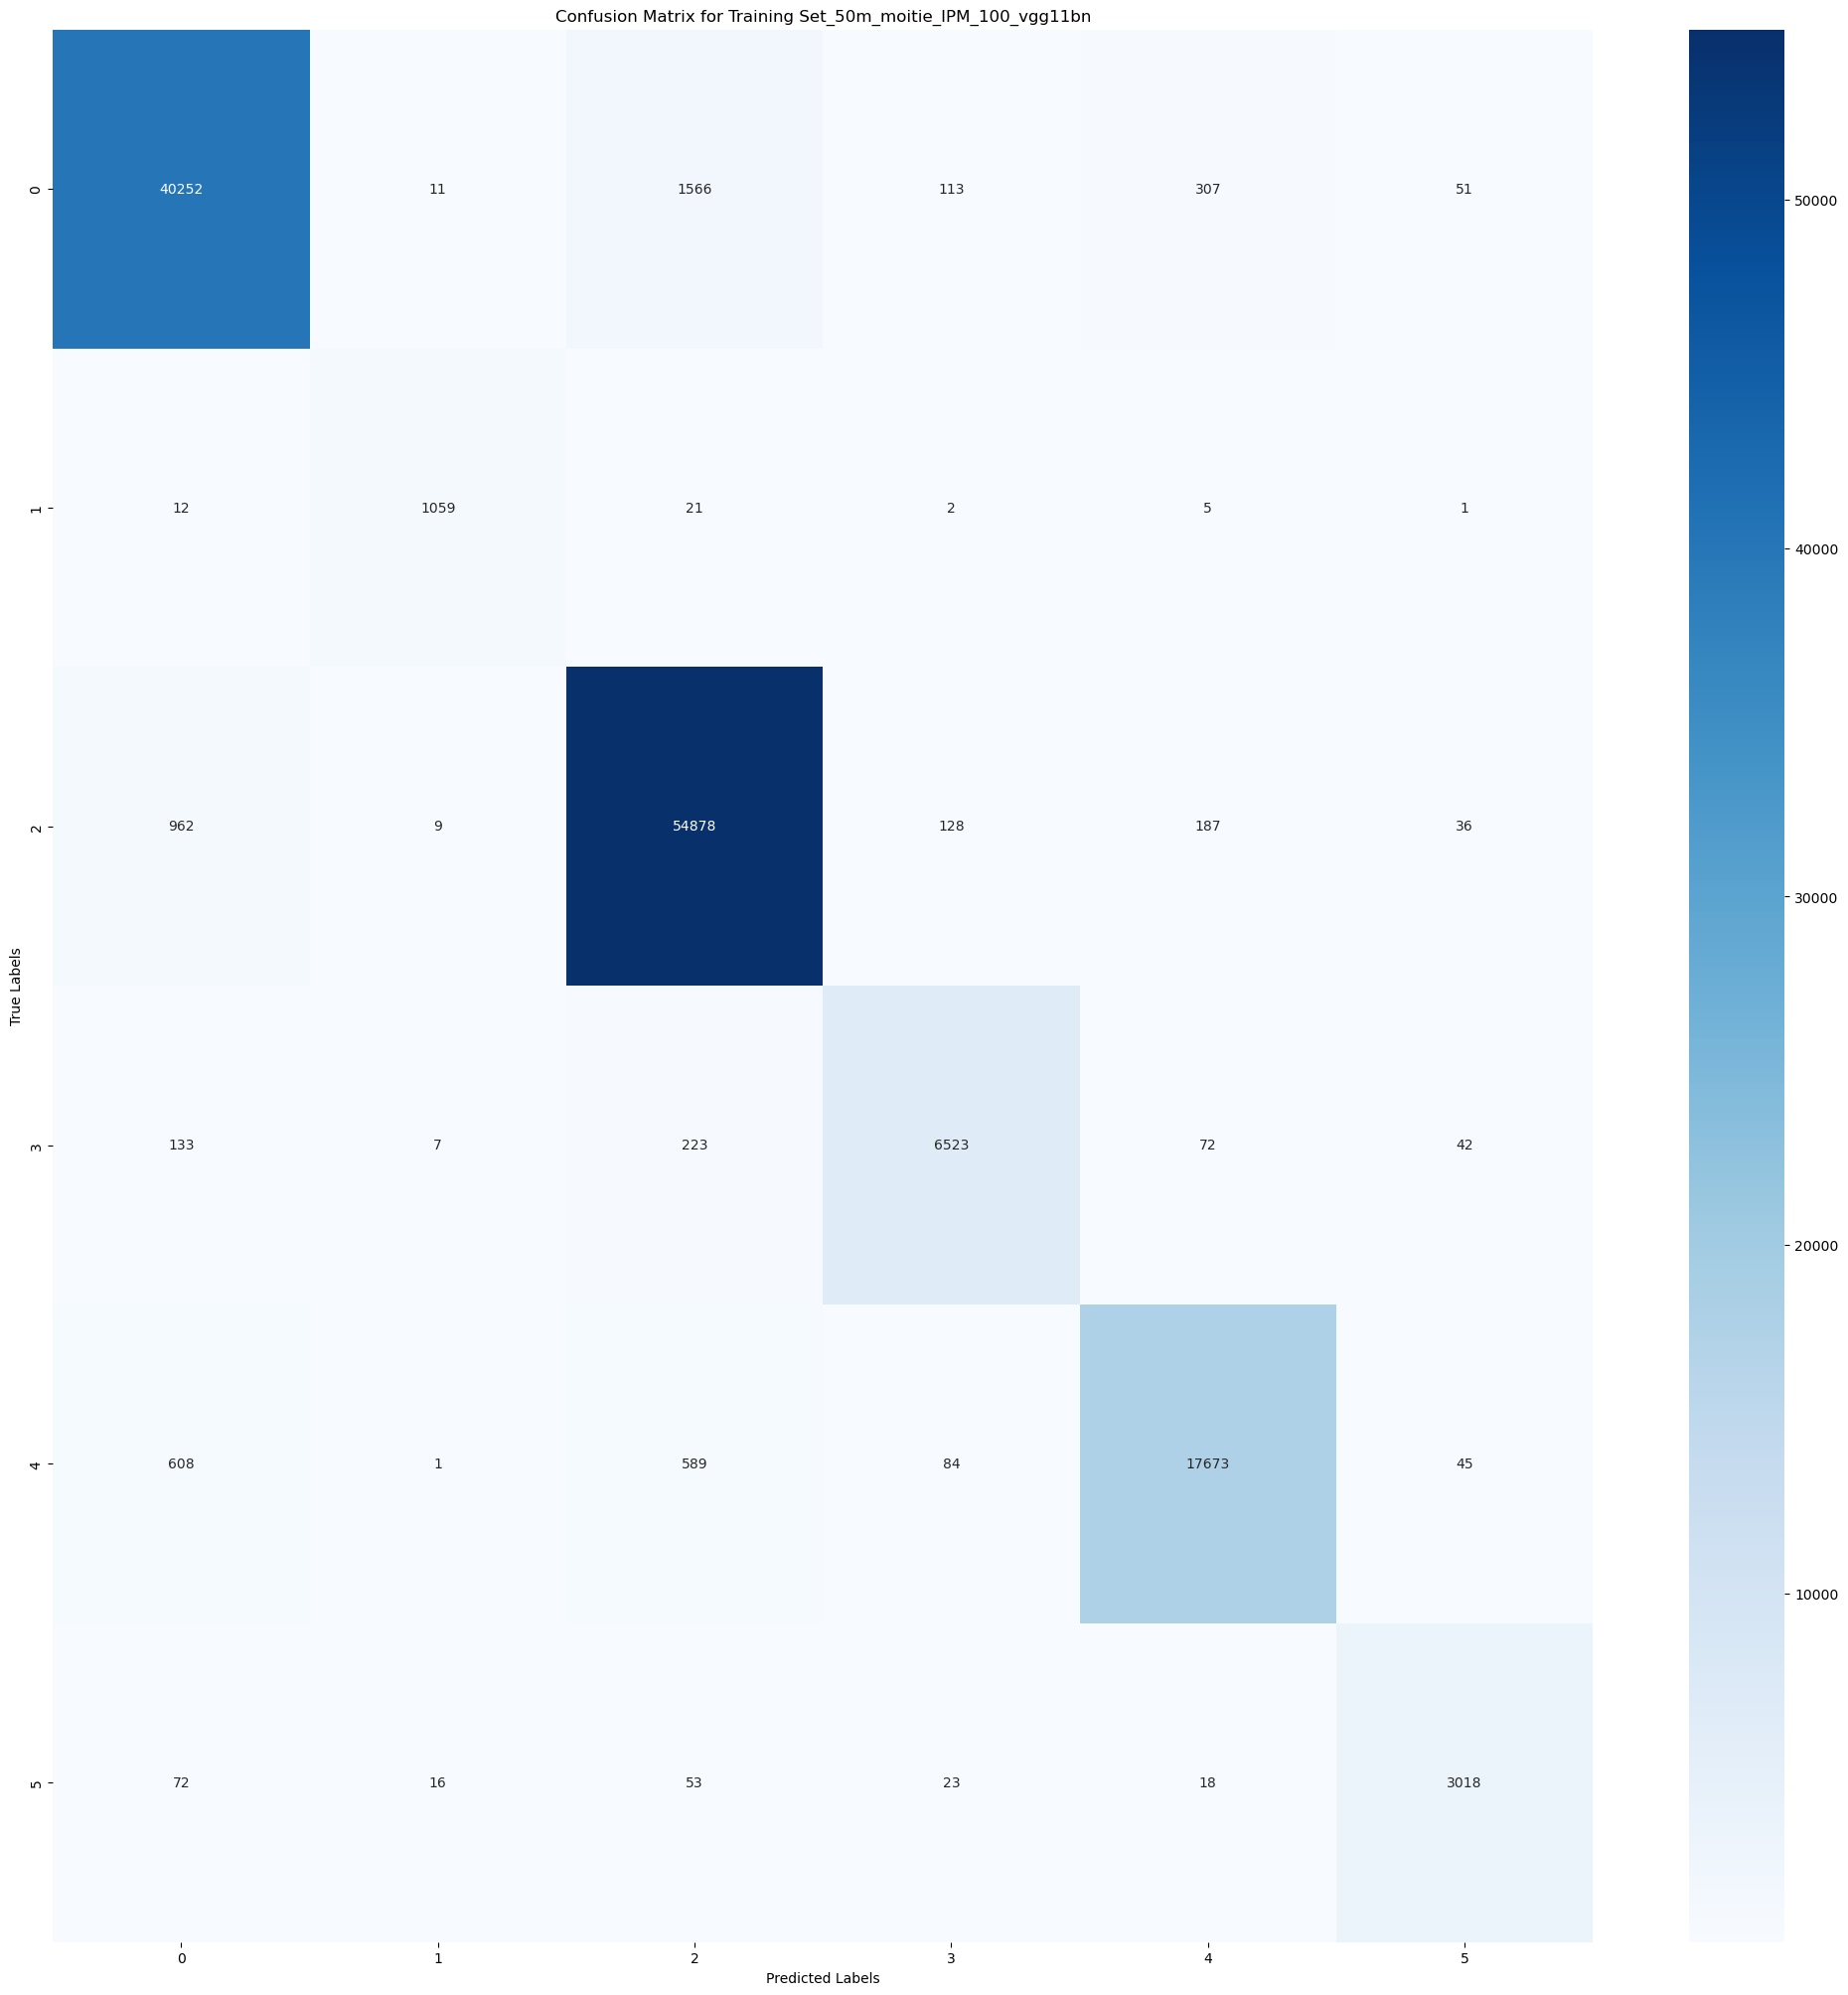

In [76]:
# Sauvegarder les labels et les prédictions
all_preds = []
all_labels = []

for inputs, labels in dataloaders_dict[f'train_{X}m_{moitiequarts}_IPM_{Y}']:
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.set_grad_enabled(False):
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)

    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

all_preds_tensor = torch.tensor(all_preds)
all_labels_tensor = torch.tensor(all_labels)

# Matrice de confusion pour le jeu d'entraînement
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for Training Set_{X}m_{moitiequarts}_IPM_{Y}_vgg11bn')
plt.show()



In [77]:
# La confusion matrix
cm

array([[40252,    11,  1566,   113,   307,    51],
       [   12,  1059,    21,     2,     5,     1],
       [  962,     9, 54878,   128,   187,    36],
       [  133,     7,   223,  6523,    72,    42],
       [  608,     1,   589,    84, 17673,    45],
       [   72,    16,    53,    23,    18,  3018]], dtype=int64)

Ce fragment de code génère un rapport de classification à partir des étiquettes réelles et des prédictions collectées lors de l'évaluation du modèle sur l'ensemble d'entraînement.

In [78]:
# Rapport de classification
from sklearn.metrics import classification_report
# Convertit les listes en array de types numpy si elles ne sont pas convertit
# Supposons que "all_preds" et "all_labels" sont des listes d'array numpy ou des tenseurs en PyTorch 
true_labels = np.array(all_labels)
predicted_labels = np.array(all_preds)

# Génère un rapport de  classification
report = classification_report(true_labels, predicted_labels, digits=4)
print(report)



              precision    recall  f1-score   support

           0     0.9575    0.9516    0.9545     42300
           1     0.9601    0.9627    0.9614      1100
           2     0.9572    0.9765    0.9668     56200
           3     0.9491    0.9319    0.9404      7000
           4     0.9677    0.9302    0.9486     19000
           5     0.9452    0.9431    0.9442      3200

    accuracy                         0.9581    128800
   macro avg     0.9561    0.9493    0.9526    128800
weighted avg     0.9581    0.9581    0.9580    128800



###### Calcul mécanique de ce qui précède

In [79]:
#Conversion des listes en array de types Numpy(Si ce n'est pas le cas)
import numpy as np

all_preds_array = np.array(all_preds)
all_labels_array = np.array(all_labels)

# Use classification_report to Calculate Metrics
from sklearn.metrics import classification_report

# Calcul et imprime le rapport de classification
print(classification_report(all_labels_array, all_preds_array))

# Calcul de l'Accuracy par Classe Mécanique
from sklearn.metrics import confusion_matrix

# Calcul de l'Accuracy par classe
cm = confusion_matrix(all_labels_array, all_preds_array)
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
print(per_class_accuracy)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     42300
           1       0.96      0.96      0.96      1100
           2       0.96      0.98      0.97     56200
           3       0.95      0.93      0.94      7000
           4       0.97      0.93      0.95     19000
           5       0.95      0.94      0.94      3200

    accuracy                           0.96    128800
   macro avg       0.96      0.95      0.95    128800
weighted avg       0.96      0.96      0.96    128800

[0.95158392 0.96272727 0.97647687 0.93185714 0.93015789 0.943125  ]


Cette portion de code étendue est conçue pour évaluer de manière plus détaillée la performance du modèle de réseau de neurones convolutif (CNN) sur l'ensemble de validation.  

100%|██████████| 80275/80275 [30:59<00:00, 43.17it/s]


Validation Loss: 1.4851
Validation Accuracy: 0.6685


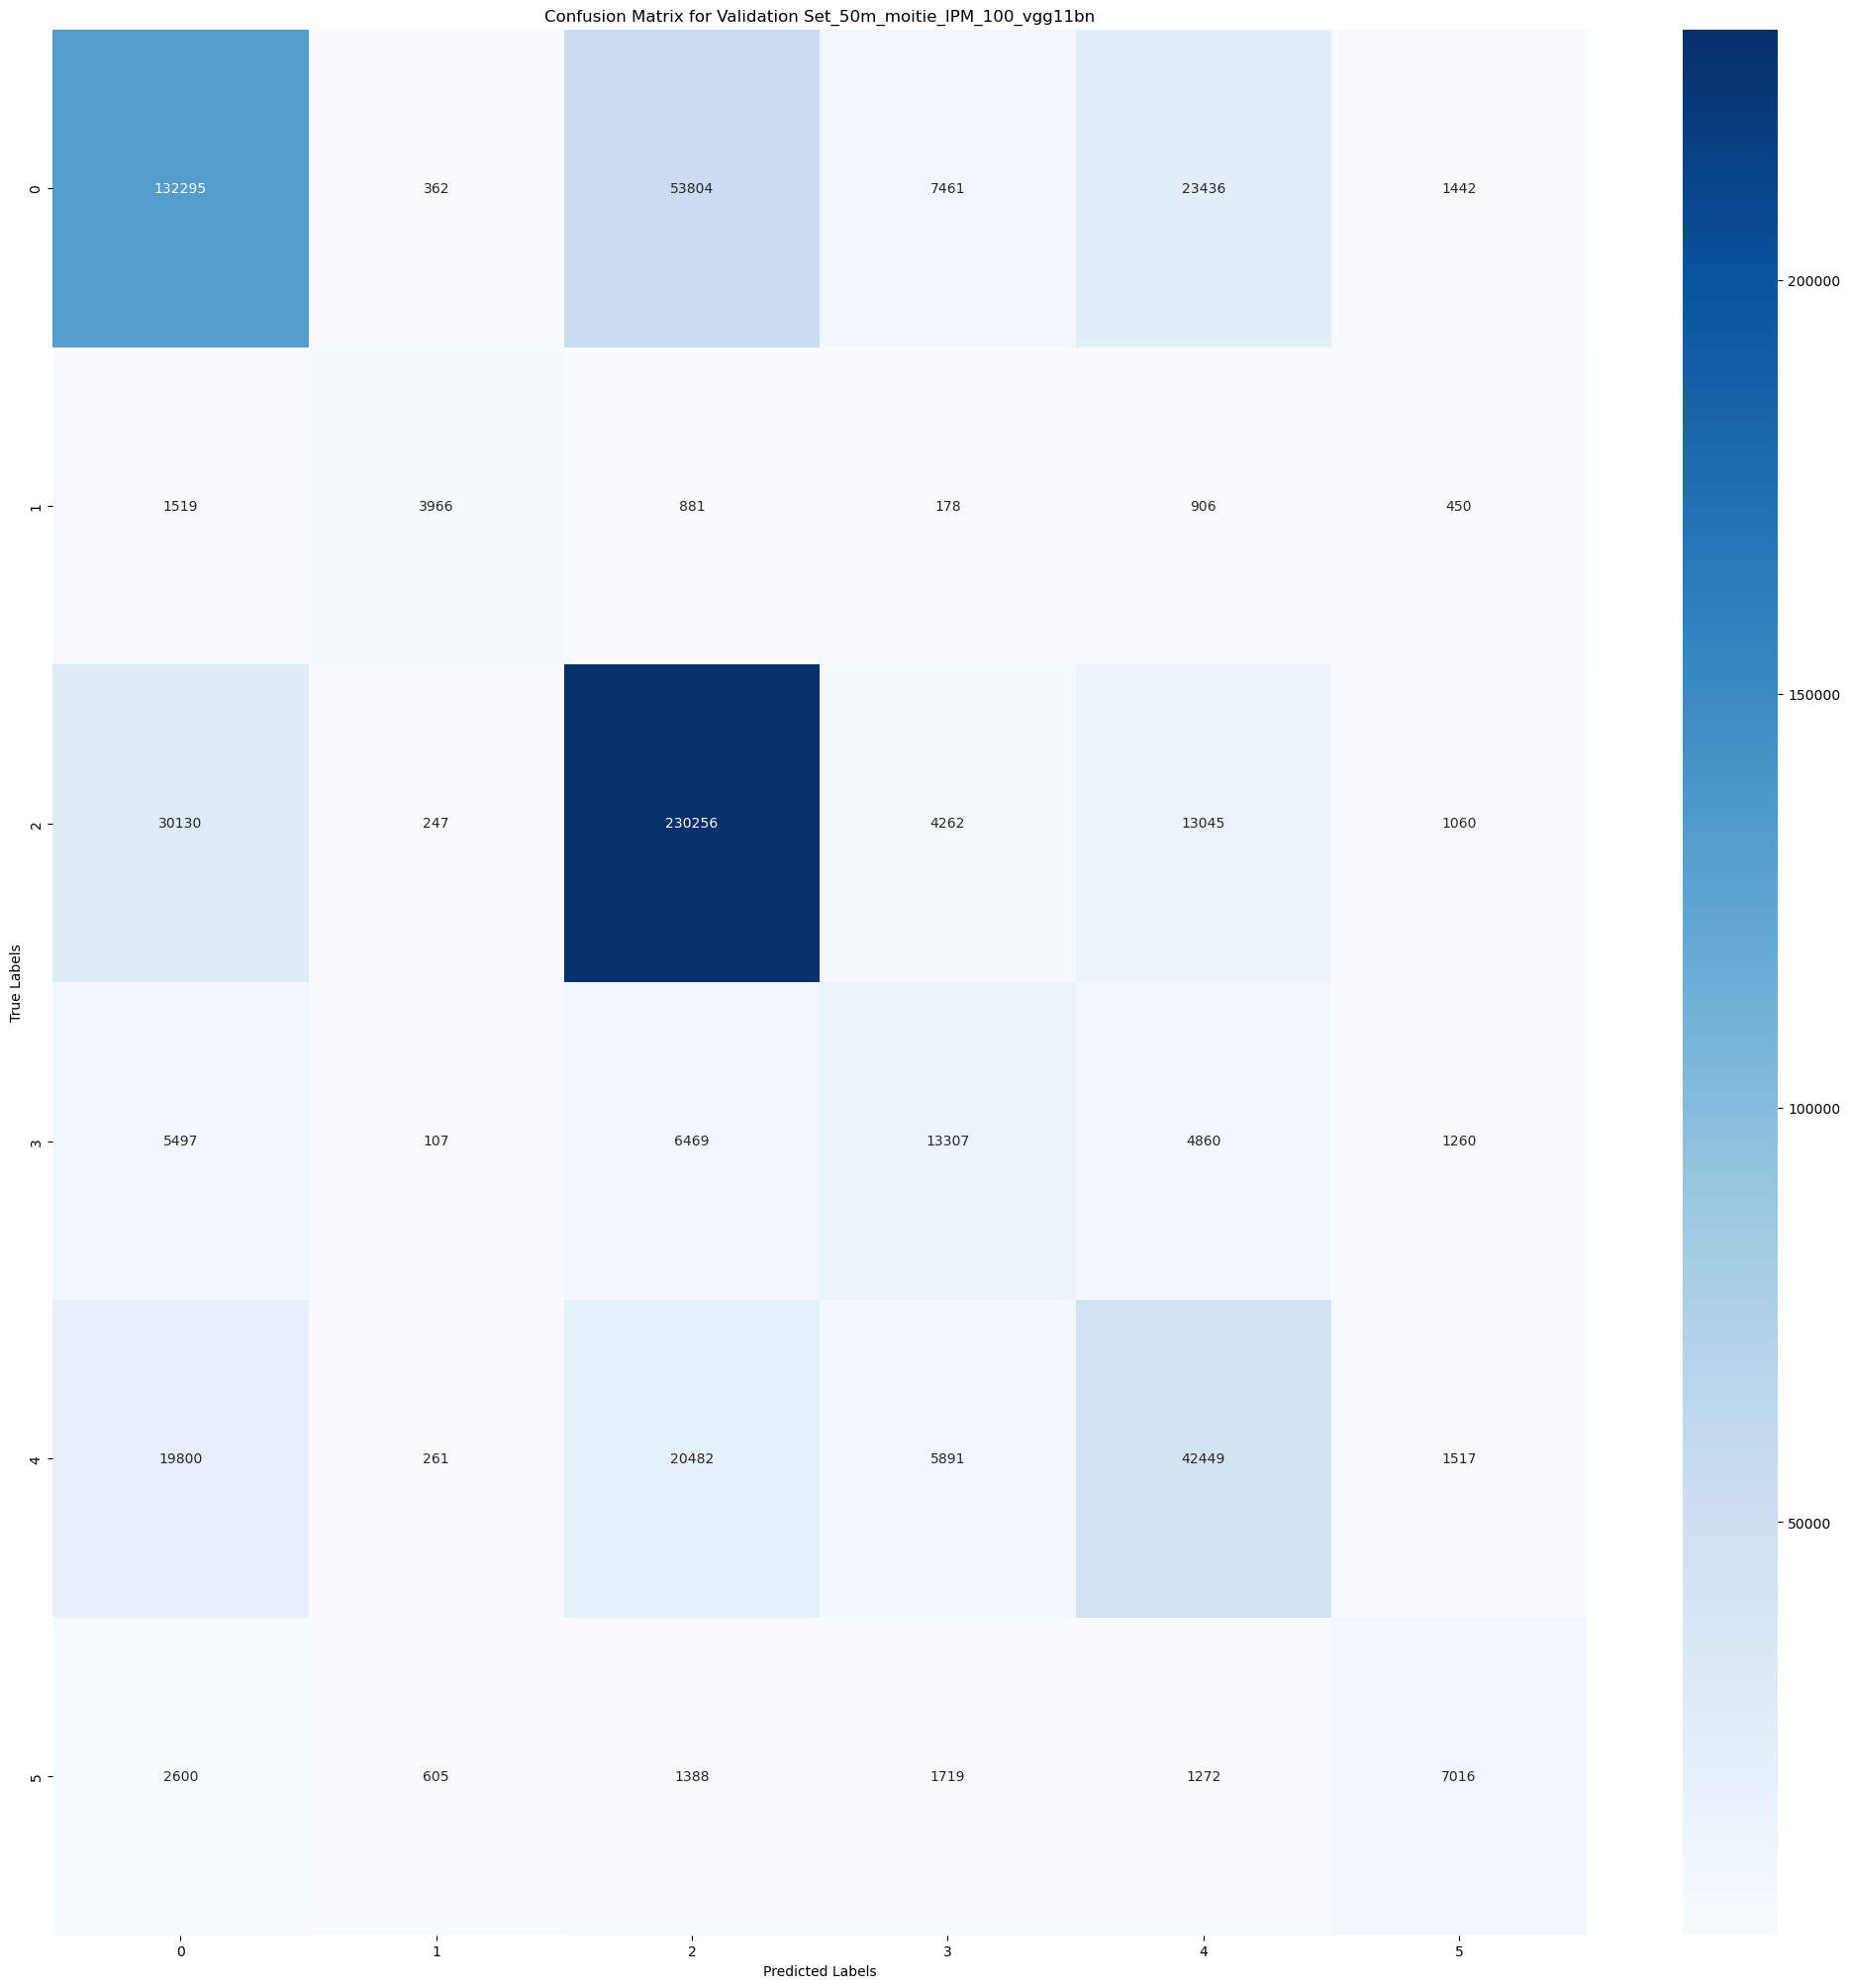

In [80]:
# Évaluation sur le jeu de validation
# Importation de la bibliothèque nécessaire pour la barre de progression
from tqdm import tqdm

# Met le modèle en mode d'évaluation. Cela est crucial car cela désactive des comportements spécifiques à l'entraînement,
# tels que les dropout layers et la normalisation par lots, qui ne devraient pas être utilisés lors de l'évaluation.
model_ft.eval()

# Initialisation des variables pour accumuler la perte totale et le nombre total de prédictions correctes
running_loss = 0.0
running_corrects = 0
total = 0

# Désactive le calcul du gradient, réduisant la consommation de mémoire et accélérant le processus
# puisque les gradients ne sont pas nécessaires pour l'évaluation.
with torch.no_grad():
        #Itère sur les données de l'ensemble de validation. tqdm est utilisé pour afficher une barre de progression.
    for inputs, labels in tqdm(dataloaders_dict[f'valid_{X}m_{moitiequarts}_IPM_{Y}']):
        # Transfère les inputs et les labels sur le dispositif de calcul (GPU ou CPU).
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Calcule les sorties en passant les inputs à travers le modèle.
        outputs = model_ft(inputs)
        
        # Calcule la perte entre les sorties prédites et les vrais labels.
        loss = criterion(outputs, labels)
        
        # Trouve la classe prédite pour chaque input en prenant l'indice de la valeur maximale dans les prédictions logit.
        _, preds = torch.max(outputs, 1)

        # Accumule la perte totale en ajoutant la perte de ce lot.
        running_loss += loss.item() * inputs.size(0)
        
        # Accumule le nombre total de prédictions correctes.
        running_corrects += torch.sum(preds == labels.data)
        
        # Accumule le nombre total d'exemples vus.
        total += inputs.size(0)
# Calcule la perte moyenne sur l'ensemble de validation.
val_loss = running_loss / total

# Calcule la précision globale sur l'ensemble de validation.
val_acc = running_corrects.double() / total

# Affiche la perte moyenne et la précision sur l'ensemble de validation.
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_acc:.4f}')

# Matrice de confusion pour le jeu de validation
val_preds = []
val_labels = []

for inputs, labels in dataloaders_dict[f'valid_{X}m_{moitiequarts}_IPM_{Y}']:
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.no_grad():
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
    
    val_preds.extend(preds.cpu().numpy())
    val_labels.extend(labels.cpu().numpy())

    
# Calcul de la matrice de confusion en utilisant scikit-learn
cm_val = confusion_matrix(val_labels, val_preds)
# Utilisation de Seaborn pour afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for Validation Set_{X}m_{moitiequarts}_IPM_{Y}_vgg11bn')
plt.show()



In [81]:
# Rapport de classification pour le jeu de validation
# Conversion des listes en tableaux numpy pour une utilisation avec scikit-learn

val_true_labels_array = np.array(val_labels)
val_predictions_array = np.array(val_preds)

# Générez le rapport de classification pour l'ensemble de validation
val_report = classification_report(val_true_labels_array, val_predictions_array, digits=4)
print(f"Classification Report for Validation Set_{X}m_{moitiequarts}_IPM_{Y}:\n", val_report)



Classification Report for Validation Set_50m_moitie_IPM_100:
               precision    recall  f1-score   support

           0     0.6896    0.6046    0.6443    218800
           1     0.7149    0.5020    0.5898      7900
           2     0.7350    0.8253    0.7775    279000
           3     0.4055    0.4224    0.4138     31500
           4     0.4938    0.4696    0.4814     90400
           5     0.5505    0.4805    0.5131     14600

    accuracy                         0.6685    642200
   macro avg     0.5982    0.5508    0.5700    642200
weighted avg     0.6650    0.6685    0.6643    642200



In [82]:
# Précision (Accuracy) par classe pour le jeu de validation
# Calculez la matrice de confusion pour l'ensemble de validation
val_cm = confusion_matrix(val_true_labels_array, val_predictions_array)

# Calculez la précision par classe manuellement à partir de la matrice de confusion
val_per_class_accuracy = val_cm.diagonal() / val_cm.sum(axis=1)
print(f"Per-class Accuracy for the Validation Set_{X}m_{moitiequarts}_IPM_{Y}:", val_per_class_accuracy)

Per-class Accuracy for the Validation Set_50m_moitie_IPM_100: [0.60463894 0.50202532 0.82529032 0.42244444 0.46956858 0.48054795]


##### Sauvegarde des graphes

In [83]:
import os
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration initiale

BASE_DIR = r'D:\Poverty_Predict_Par_Milieu'#Choisir une base directory

GRAPH_DIR = os.path.join(BASE_DIR, f'Graph_etape_cnn_pred_nightlights_{X}m_{moitiequarts}_IPM_{Y}_vgg11bn')
os.makedirs(GRAPH_DIR, exist_ok=True)

# Fonction pour générer et sauvegarder l'histogramme de distribution
def save_histogram(data, column, title, filename):
    plt.hist(data[column], bins='auto', alpha=0.7, rwidth=0.85)
    plt.xlabel('Nightlights Bin')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(axis='y', alpha=0.75)
    plt.savefig(os.path.join(GRAPH_DIR, filename))
    plt.close()

# Fonction pour générer et sauvegarder la heatmap de la matrice de confusion
def save_confusion_matrix_heatmap(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(25,25))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.savefig(os.path.join(GRAPH_DIR, filename))
    plt.close()

# Fonction pour générer et sauvegarder le rapport de classification
def save_classification_report(y_true, y_pred, filename, digits=4):
    report = classification_report(y_true, y_pred, digits=digits)
    with open(os.path.join(GRAPH_DIR, filename), 'w') as f:
        f.write(report)

# Génération et sauvegarde des fichiers
save_histogram(globals()[df_name], f'nightlights_{X}m_bins', f'Distribution of Nightlights Bin', f'distribution_nightlights_bin_{X}m_IPM_{Y}_vgg11bn.png')
save_confusion_matrix_heatmap(all_labels, all_preds, f'Confusion Matrix for Training Set', f'confusion_matrix_train_{X}m_IPM_{Y}_vgg11bn.png')
save_confusion_matrix_heatmap(val_labels, val_preds, f'Confusion Matrix for Validation Set', f'confusion_matrix_val_{X}m_IPM_{Y}_vgg11bn.png')
save_classification_report(all_labels_array, all_preds_array, f'classification_report_train_{X}m_IPM_{Y}_vgg11bn.txt')
save_classification_report(val_true_labels_array, val_predictions_array, f'classification_report_val_{X}m_IPM_{Y}_vgg11bn.txt')